# Análisis Exploratorio de Datos (2)

## Exploración de relaciones

Desde un punto de vista conceptual:

* Variable Respuesta vs Variables explicativas
* Variables Explicativas vs Otras variables Explicativas
* Variable Respuesta vs Otras variables Respuesta

Desde un punto de vista práctico:

* Variable Cualitativa vs Variable Cualitativa
* Variable Continua vs Variable Cualitativa
* Variable Continua vs Variable Continua

Inicio de la sesión

In [1]:
#from pyspark import SparkContext
#sc = SparkContext()
#from pyspark.sql import SQLContext
#sqlContext=SQLContext(sc)

In [2]:
bd5 = sqlContext.read.format(
    "com.databricks.spark.csv"
).option("header", "true").load("bd5.csv", inferSchema=True)
sqlContext.registerDataFrameAsTable(bd5, "bd5")

## V. Continua vs V. Cualitativa


Tablas de Resumen Numérico

In [3]:
g3 = sqlContext.sql("select Dest, count(*) as n, \
               avg(Arr_Delay) as Mean, \
               stddev(Arr_Delay) as Std \
               from bd5 group by Dest")
g3.show()

+----+----+------------------+------------------+
|Dest|   n|              Mean|               Std|
+----+----+------------------+------------------+
| ORD|3734| 7.260846277450455|63.067425163254285|
| LAS|3675|14.813877551020408| 46.31750232144348|
| LAX|5253| 22.35275080906149| 56.97652432880393|
| ATL|3081|3.1830574488802337|  44.7060919887739|
| DEN|3889|12.572897917202365| 50.46850865749093|
| PHX|3243|11.315757015109467| 43.22056776989168|
| DFW|3248| 6.710591133004926|63.411867733155084|
| SFO|4343| 20.50448998388211| 50.34815147630457|
+----+----+------------------+------------------+



Resumen Gráfico

In [4]:
pdf3=g3.toPandas()
pdf3

,Dest,n,Mean,Std
0,ORD,3734,7.260846,63.067425
1,LAS,3675,14.813878,46.317502
2,LAX,5253,22.352751,56.976524
3,ATL,3081,3.183057,44.706092
4,DEN,3889,12.572898,50.468509
5,PHX,3243,11.315757,43.220568
6,DFW,3248,6.710591,63.411868
7,SFO,4343,20.504490,50.348151


Representación gráfica de la información agregada

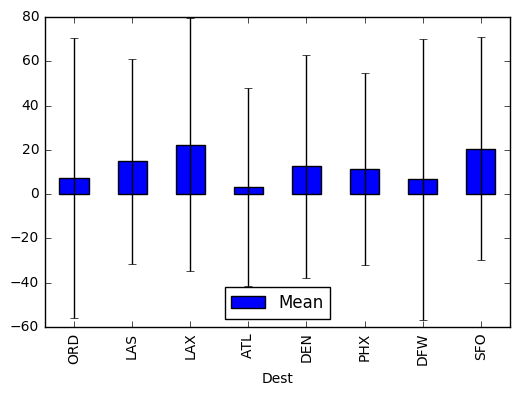

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

pdf3.plot(kind='bar',x='Dest',y='Mean',yerr='Std')

Representación gráfica de una muestra de datos 

In [7]:
pdf4 = bd5.sample(False, 0.1, 0).select('Dest','Horario','ARR_DELAY',
                                        'DEP_DELAY','RetrasoNeto').toPandas()
pdf4[1:10]

,Dest,Horario,ARR_DELAY,DEP_DELAY,RetrasoNeto
1,DFW,3,-31.0,-9.0,-22.0
2,SFO,3,-25.0,0.0,-25.0
3,LAX,1,-11.0,-7.0,-4.0
4,DFW,4,-21.0,-9.0,-12.0
5,DFW,1,-6.0,-7.0,1.0
6,DFW,4,-8.0,-2.0,-6.0
7,ORD,2,2.0,-6.0,8.0
8,ORD,1,-25.0,-5.0,-20.0
9,ATL,4,-4.0,-2.0,-2.0


(-200, 1000)

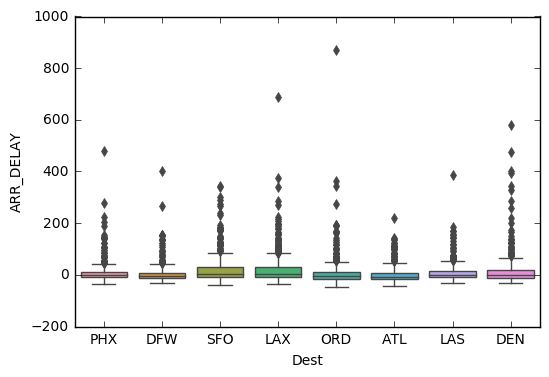

In [11]:
import seaborn as sns
plt.figure()
sns.boxplot(x='Dest',y='ARR_DELAY',data=pdf4)
plt.ylim([-200, 1000])

(-20, 80)

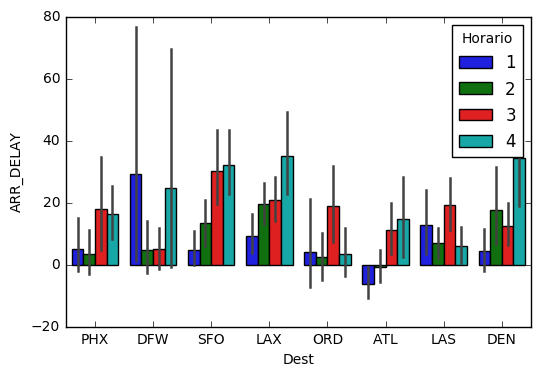

In [14]:
plt.figure()
sns.barplot(x="Dest", y="ARR_DELAY", hue="Horario", data=pdf4)
plt.ylim([-20, 80])

## V. Cualitativa vs V. Cualitativa

Resumen Numérico

In [15]:
pdf6 = sqlContext.sql("select Dest, Retraso, count(*) as n \
               from bd5 group by Dest, Retraso \
               order by Dest, Retraso").toPandas()
pdf6

,Dest,Retraso,n
0,ATL,0,2527
1,ATL,1,554
2,DEN,0,2885
3,DEN,1,1004
4,DFW,0,2647
5,DFW,1,601
6,LAS,0,2620
7,LAS,1,1055
8,LAX,0,3229
9,LAX,1,2024


Resumen Gráfico

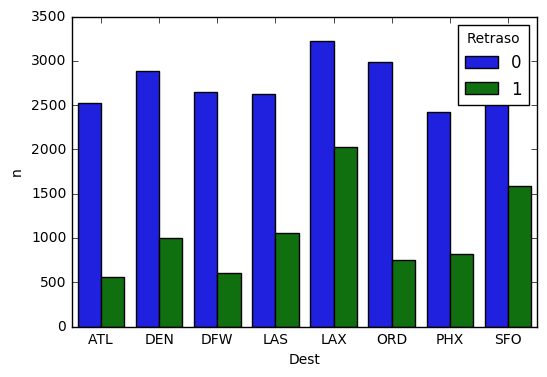

In [16]:
sns.barplot(x="Dest", y="n", hue="Retraso", data=pdf6)

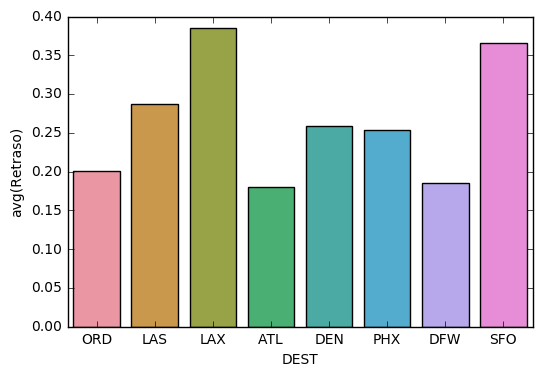

In [20]:
pdf7 = bd5.groupBy('DEST').mean('Retraso').toPandas()
sns.barplot(x="DEST", y="avg(Retraso)", data=pdf7)

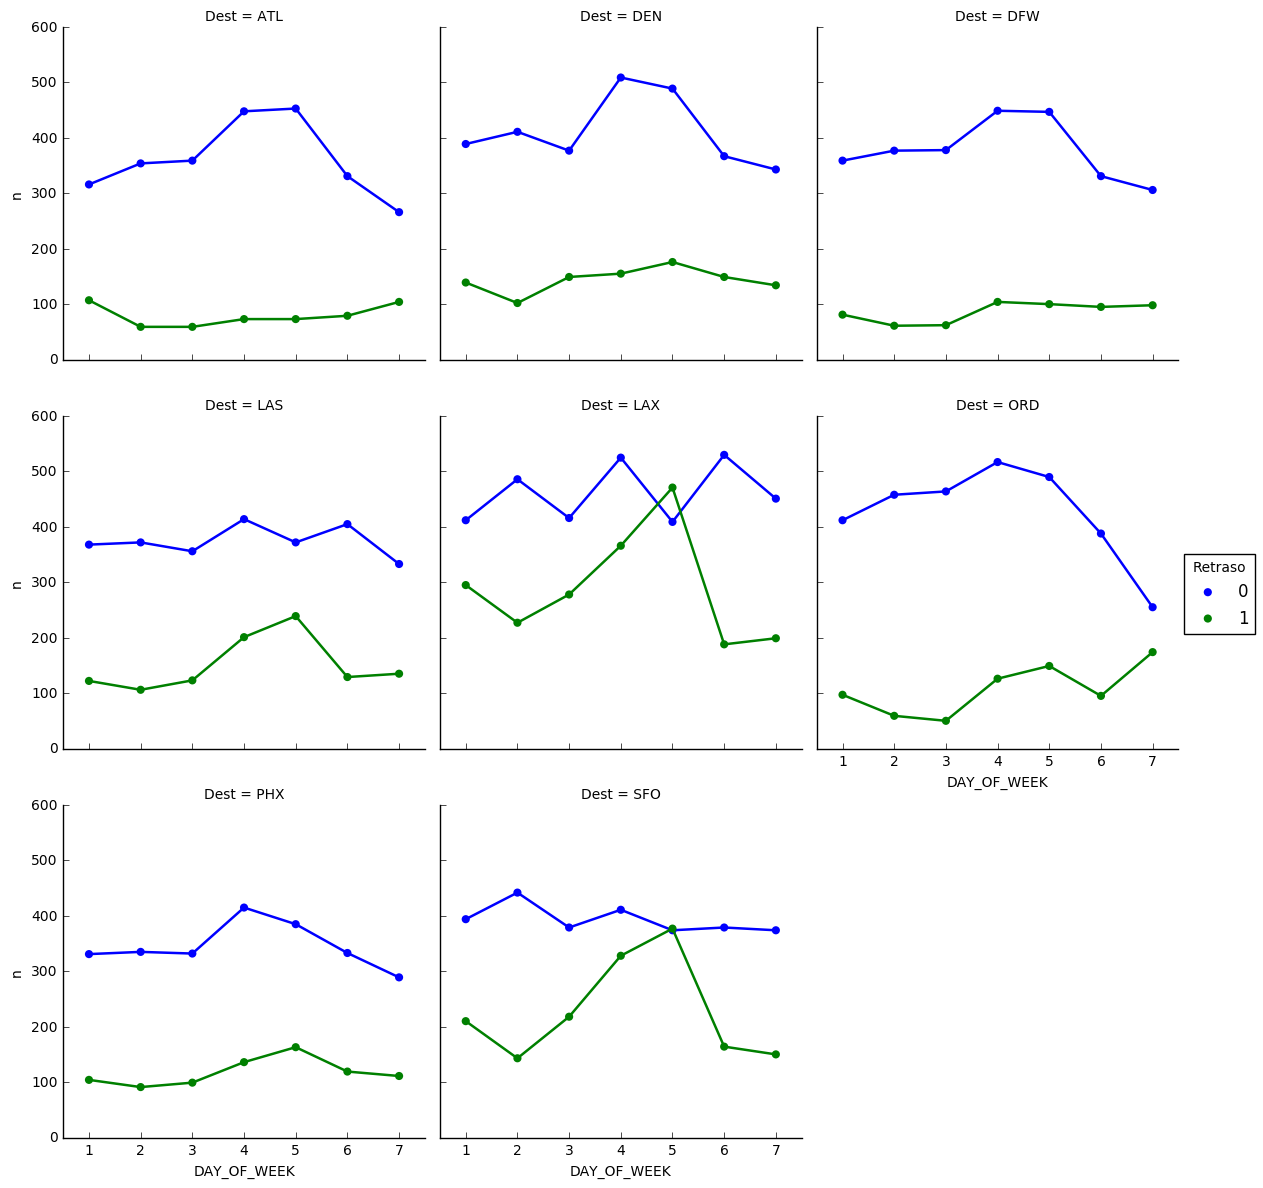

In [21]:
pdf8 = sqlContext.sql("select DAY_OF_WEEK, Dest, Retraso, count(*) as n \
               from bd5 group by DAY_OF_WEEK, Dest, Retraso \
               order by DAY_OF_WEEK, Dest, Retraso").toPandas()

sns.factorplot(x="DAY_OF_WEEK", y="n", col="Dest", hue="Retraso", data=pdf8, col_wrap=3,)

## V. Continua vs V. Continua

Resumen Numérico

In [22]:
bd5.corr('ARR_DELAY','DEP_DELAY')

0.9571345646224755

In [23]:
bd5.corr('RetrasoNeto','DEP_DELAY')

0.08921162142633947

Resumen correlaciones a partir de una muestra

In [24]:
pdf4.corr()

,Horario,ARR_DELAY,DEP_DELAY,RetrasoNeto
Horario,1.000000,0.087638,0.081273,0.044104
ARR_DELAY,0.087638,1.000000,0.973316,0.313102
DEP_DELAY,0.081273,0.973316,1.000000,0.086816
RetrasoNeto,0.044104,0.313102,0.086816,1.000000


Resumen Gráfico

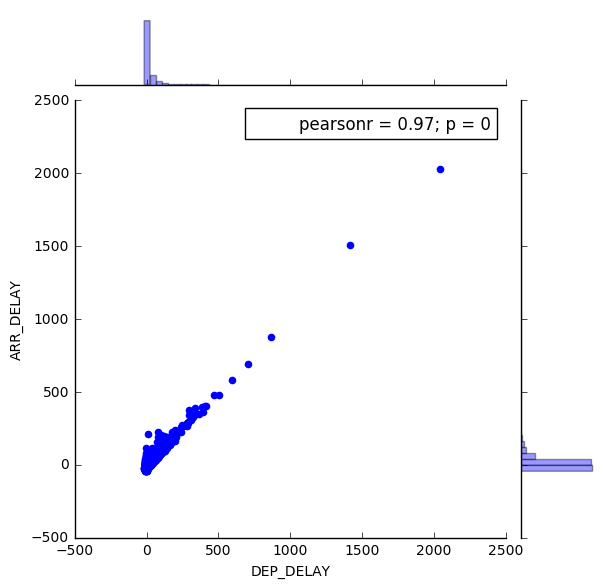

In [25]:
sns.jointplot(x="DEP_DELAY", y="ARR_DELAY", data=pdf4)

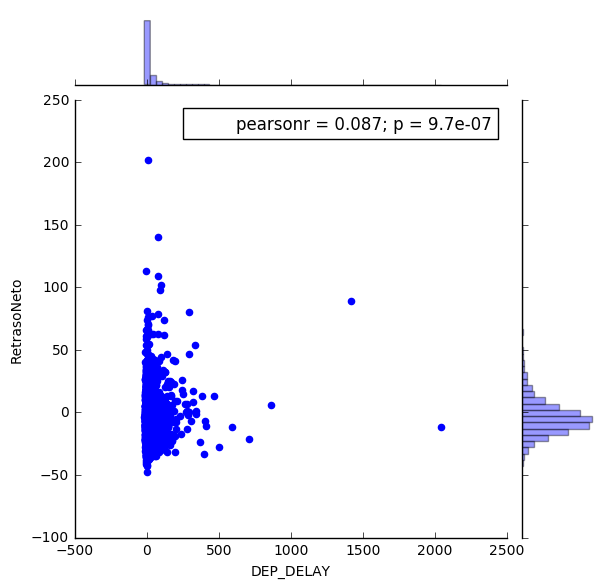

In [26]:
sns.jointplot(x="DEP_DELAY", y="RetrasoNeto", data=pdf4)